In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download atulyakumar98/pothole-detection-dataset

 95% 185M/194M [00:01<00:00, 154MB/s]
100% 194M/194M [00:01<00:00, 136MB/s]


In [ ]:
! unzip /content/pothole-detection-dataset.zip

Archive:  /content/pothole-detection-dataset.zip
  inflating: normal/1.jpg            
  inflating: normal/10.jpg           
  inflating: normal/100.jpg          
  inflating: normal/101.jpg          
  inflating: normal/102.jpg          
  inflating: normal/103.jpg          
  inflating: normal/104.jpg          
  inflating: normal/105.jpg          
  inflating: normal/106.jpg          
  inflating: normal/107.jpg          
  inflating: normal/108.jpg          
  inflating: normal/109.jpg          
  inflating: normal/11.jpg           
  inflating: normal/110.jpg          
  inflating: normal/111.jpg          
  inflating: normal/112.jpg          
  inflating: normal/113.jpg          
  inflating: normal/114.jpg          
  inflating: normal/115.jpg          
  inflating: normal/116.jpg          
  inflating: normal/117.jpg          
  inflating: normal/118.jpg          
  inflating: normal/119.jpg          
  inflating: normal/12.jpg           
  inflating: normal/120.jpg          
 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout


from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

import tensorflow as tf

import cv2
import os

import numpy as np


In [ ]:
DATADIRTRAIN="/content/data"






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder= "/content/data/normal"

c=0
for filename in os.listdir(folder):
  c+=1
print("Normal="+ str(c))


Normal=352


In [ ]:
folder= "/content/data/potholes"

c=0
for filename in os.listdir(folder):
  c+=1
print("potholes="+ str(c))


potholes=329


In [ ]:

from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
		rotation_range = 240,
		shear_range = 0.2,
		zoom_range = 0.3,
		horizontal_flip = True,
		brightness_range = (0.2, 1.5),width_shift_range=0.2, 
        height_shift_range=0.2)



folder= "/content/data/normal"

c=0
for filename in os.listdir(folder):
    temp=os.path.join(folder,filename)
        
      

    

    
    img = load_img(temp)
    
    x = img_to_array(img)
    
    x = x.reshape((1, ) + x.shape)

    
    i = 0
    for batch in datagen.flow(x, batch_size = 1,
                save_to_dir ='/content/MAIN DATA/normal',
                save_prefix ='image', save_format ='jpeg'):
      i += 1
      if i >=20:
        break


  

In [ ]:

from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
		rotation_range = 240,
		shear_range = 0.2,
		zoom_range = 0.3,
		horizontal_flip = True,
		brightness_range = (0.2, 1.5),width_shift_range=0.2, 
        height_shift_range=0.2)



folder= "/content/data/potholes"

c=0
for filename in os.listdir(folder):
    temp=os.path.join(folder,filename)
        
      

    

    
    img = load_img(temp)
    
    x = img_to_array(img)
    
    x = x.reshape((1, ) + x.shape)

    
    i = 0
    for batch in datagen.flow(x, batch_size = 1,
                save_to_dir ='/content/MAIN DATA/potholes',
                save_prefix ='image', save_format ='jpeg'):
      i += 1
      if i >= 21:
        break


  

In [ ]:
DATADIRTRAIN="/content/drive/MyDrive/IOT"





In [ ]:
trainer=ImageDataGenerator(rescale=1/255,validation_split=0.2)


In [ ]:
train= trainer.flow_from_directory(
       DATADIRTRAIN,
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical',subset='training')

valid = trainer.flow_from_directory(
        DATADIRTRAIN,
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical',subset='validation')

Found 8146 images belonging to 2 classes.
Found 2035 images belonging to 2 classes.


In [ ]:
train.class_indices

{'normal': 0, 'potholes': 1}

In [ ]:
valid.class_indices

{'normal': 0, 'potholes': 1}

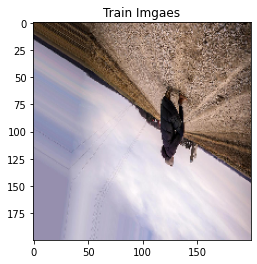

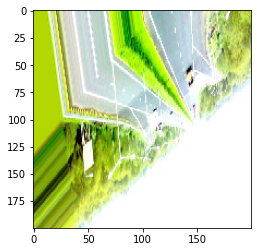

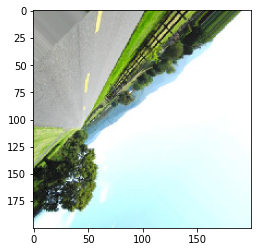

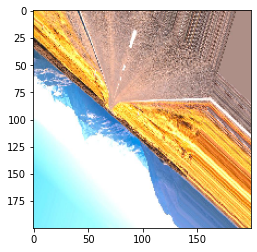

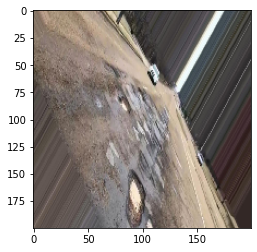

In [ ]:
plt.title("Train Imgaes")
for i in range(5):
  x,y=train.__getitem__(i)
  #plt.gray()
  #
  plt.imshow(x[0])
  plt.show()


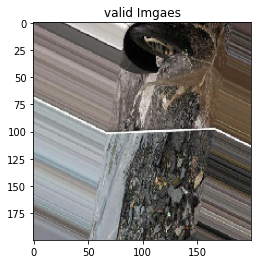

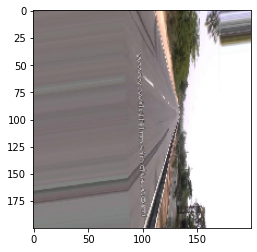

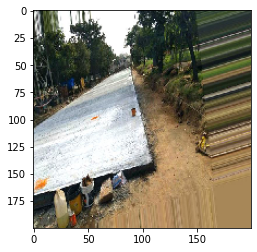

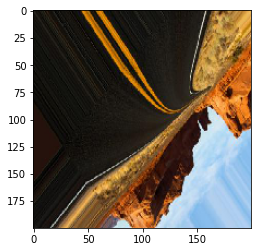

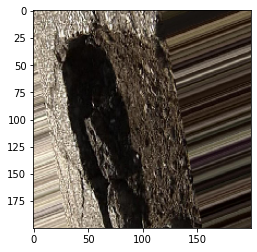

In [ ]:
plt.title("valid Imgaes")
for i in range(5):
  x,y=valid.__getitem__(i)
  #plt.gray()
  #
  plt.imshow(x[0])
  plt.show()


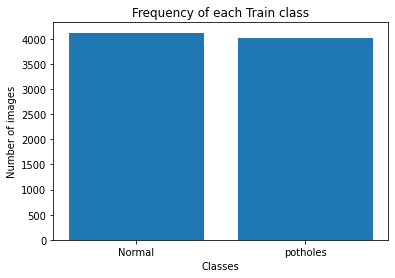

In [ ]:
from collections import Counter
counter = Counter(train.classes)   
x=['Normal','potholes']
y=[]                       
for i in counter:
    y.append(counter[i])
plt.title("Frequency of each Train class")
plt.xlabel("Classes")
plt.ylabel("Number of images")

plt.bar(x,y)
plt.show()

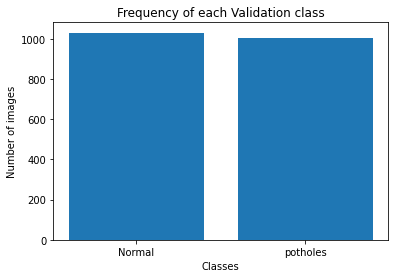

In [ ]:
from collections import Counter
counter = Counter(valid.classes)   
x=['Normal','potholes']
y=[]                       
for i in counter:
    y.append(counter[i])
plt.title("Frequency of each Validation class")
plt.xlabel("Classes")
plt.ylabel("Number of images")

plt.bar(x,y)
plt.show()
   

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(200, 200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(16, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      2432      
                                                                 
 activation (Activation)     (None, 196, 196, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 96, 96, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                    

In [ ]:
from keras import optimizers
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',patience=10)

mcp_save=tf.keras.callbacks.ModelCheckpoint(filepath='model_.{epoch:02d}-{val_loss:.2f}.h5',save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
hist=model.fit(train,epochs=80,batch_size=32, validation_data = valid,callbacks=[early_stop,mcp_save])

Epoch 1/80
255/255 [==============================] - 2315s 9s/step - loss: 0.5079 - accuracy: 0.7492 - val_loss: 0.3152 - val_accuracy: 0.8727
Epoch 2/80
255/255 [==============================] - 182s 714ms/step - loss: 0.3524 - accuracy: 0.8456 - val_loss: 0.3431 - val_accuracy: 0.8462
Epoch 3/80
255/255 [==============================] - 180s 706ms/step - loss: 0.2882 - accuracy: 0.8788 - val_loss: 0.2718 - val_accuracy: 0.8855
Epoch 4/80
255/255 [==============================] - 179s 702ms/step - loss: 0.2599 - accuracy: 0.8909 - val_loss: 0.2157 - val_accuracy: 0.9096
Epoch 5/80
255/255 [==============================] - 177s 694ms/step - loss: 0.2313 - accuracy: 0.9040 - val_loss: 0.2136 - val_accuracy: 0.9002
Epoch 6/80
255/255 [==============================] - 178s 699ms/step - loss: 0.1916 - accuracy: 0.9214 - val_loss: 0.1951 - val_accuracy: 0.9199
Epoch 7/80
255/255 [==============================] - 177s 695ms/step - loss: 0.1788 - accuracy: 0.9278 - val_loss: 0.2375 - v

In [ ]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,0.507939,0.749202,0.315236,0.872727
1,0.352383,0.845568,0.343114,0.846192
2,0.288163,0.878836,0.271816,0.885504
3,0.259873,0.890867,0.215739,0.909582
4,0.231307,0.904002,0.213558,0.900246
5,0.191613,0.921434,0.195087,0.919902
6,0.178777,0.927817,0.237532,0.893366
7,0.137243,0.946845,0.215105,0.915479
8,0.096095,0.961331,0.187083,0.925799
9,0.077856,0.970660,0.214305,0.923833


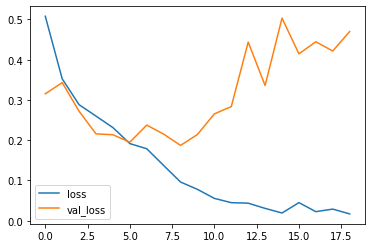

In [ ]:
metrics[['loss','val_loss']].plot()
plt.show()

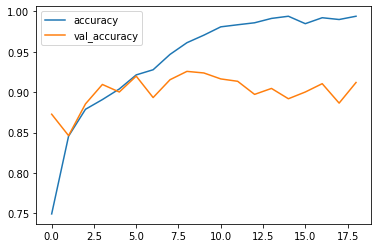

In [ ]:

metrics[['accuracy','val_accuracy']].plot()
plt.show()